In [1]:
import pandas as pd

In [2]:
pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

In [4]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [7]:
df.isna().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
catagorical_data = ['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary']

for i in catagorical_data:
    df[i]=df[i].astype('str')
    df[i]=LE.fit_transform(df[i])

In [10]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,10,10,1,168
1,2,1,12,8,1,234
2,1,1,33,23,1,289
3,2,1,39,33,1,88
4,2,1,34,36,1,172
...,...,...,...,...,...,...
392,2,0,26,24,1,19
393,2,0,24,11,1,200
394,2,0,36,18,1,14
395,2,0,17,7,1,353


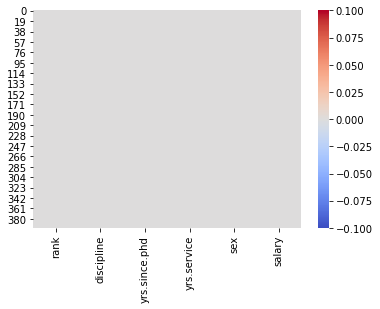

In [11]:
sns.heatmap(df.isna(), cmap = 'coolwarm')
plt.show()

In [12]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.256927,22.846348,0.901763,188.299748
std,0.757486,0.498682,14.676288,15.884497,0.298010,108.560500
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,10.000000,10.000000,1.000000,93.000000
50%,2.000000,1.000000,20.000000,20.000000,1.000000,192.000000
75%,2.000000,1.000000,33.000000,34.000000,1.000000,282.000000
max,2.000000,1.000000,52.000000,51.000000,1.000000,370.000000


In [13]:
des=pd.DataFrame(df.describe())
des.iloc[[1,5,6,7]]

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
mean,1.508816,0.544081,22.256927,22.846348,0.901763,188.299748
50%,2.000000,1.000000,20.000000,20.000000,1.000000,192.000000
75%,2.000000,1.000000,33.000000,34.000000,1.000000,282.000000
max,2.000000,1.000000,52.000000,51.000000,1.000000,370.000000


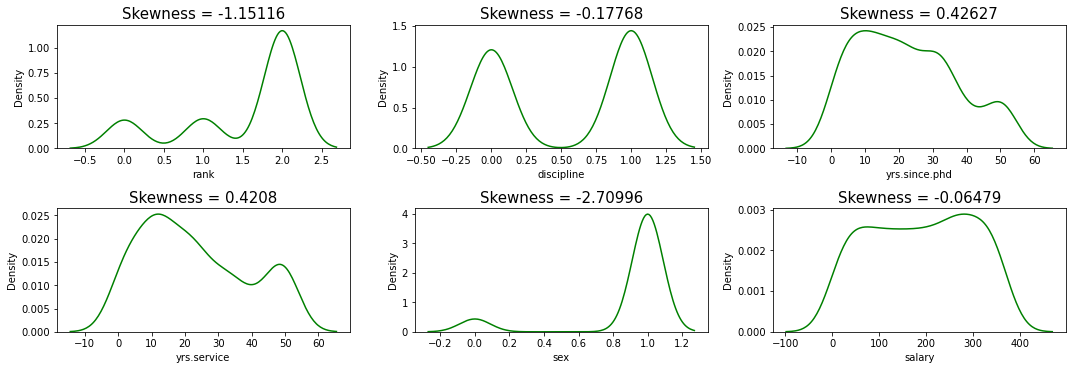

In [14]:
plt.figure(figsize=(15,15))
collist = df.columns.values
for i in range (0, len(collist)):
    plt.subplot(6,3,i+1)         
    sns.kdeplot(df[collist[i]], color = "green")
    plt.title(f"Skewness = {round(df[collist[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

In [15]:
skewness=[]
for i in df.skew().values:
    skewness.append(i)
    
df_skewness= pd.DataFrame({"Feature_names": collist,"Skew": skewness})
df_skewness= df_skewness.sort_values(by="Skew", ascending=False, ignore_index= True)


skew_postive_row= []
skew_negative_row=[]
for index, row in df_skewness.iterrows():
    if row['Skew']>0.49:
        skew_postive_row.append(row['Feature_names'])
    elif row['Skew']< -0.49:
        skew_negative_row.append(row['Feature_names'])
        
df_skewness

,Feature_names,Skew
0,yrs.since.phd,0.426273
1,yrs.service,0.420799
2,salary,-0.064795
3,discipline,-0.177684
4,rank,-1.151164
5,sex,-2.709958


In [16]:
print("\n\nFeature names with Skewness is present more than +/-0.5 as follows:\n","\n\nPostive Skewed data:\n", skew_postive_row,"\n\nnegative Skewed data:\n", skew_negative_row)       



Feature names with Skewness is present more than +/-0.5 as follows:
 

Postive Skewed data:
 [] 

negative Skewed data:
 ['rank', 'sex']


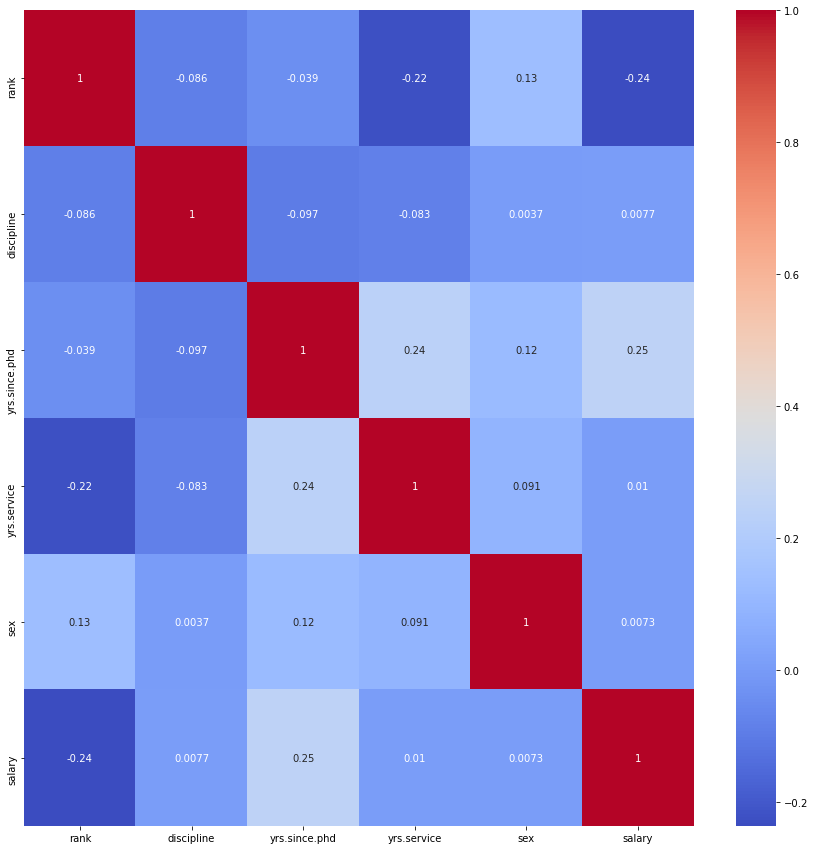

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True, cmap = "coolwarm")
plt.show()